## Team Bugzero

In [6]:


import numpy as np 
import pandas as pd 



from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


tweets=pd.read_csv("../input/demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head(5)

demonetization-tweets.csv



,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [7]:
tweets.tail(5)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
14935,14936,14936,RT @saxenavishakha: Ghost of demonetization re...,False,0,NaN,2017-04-11 14:26:38,False,NaN,8.518037e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",MuzzammilAap,4,True,False
14936,14937,14937,N d modi fans-d true nationalists of the count...,False,0,NaN,2017-04-11 14:19:51,True,NaN,8.518020e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",JusteyAlex,0,False,False
14937,14938,14938,RT @bharat_builder: Lol. Demonetization has fi...,False,0,NaN,2017-04-11 14:19:14,False,NaN,8.518018e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",pavan_sethi,30,True,False
14938,14939,14939,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,False,0,NaN,2017-04-11 14:13:14,False,NaN,8.518003e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,True,False
14939,14940,14940,"@Vidyut B team of BJP. CIA baby. CCTV, EVM but...",False,1,Vidyut,2017-04-11 14:13:06,True,8.516909e+17,8.518003e+17,15199808.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,False,False


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


<AxesSubplot:title={'center':'sentiment analysis'}>

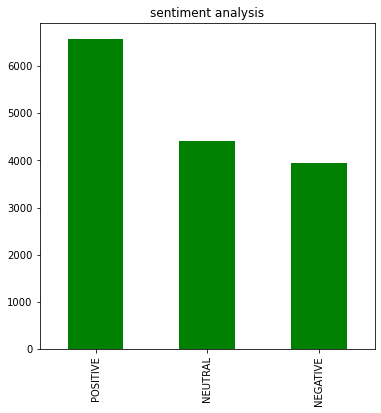

In [5]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis",color='green')

<AxesSubplot:title={'center':'sentiment analysis'}>

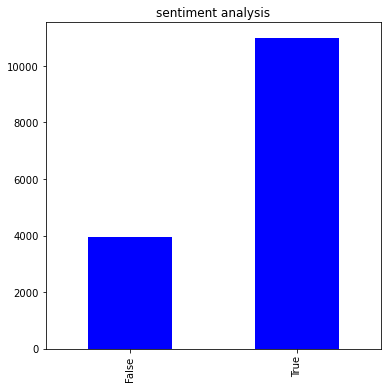

In [30]:
tweets.isRetweet.value_counts().plot(kind='bar',title="sentiment analysis",color='blue')

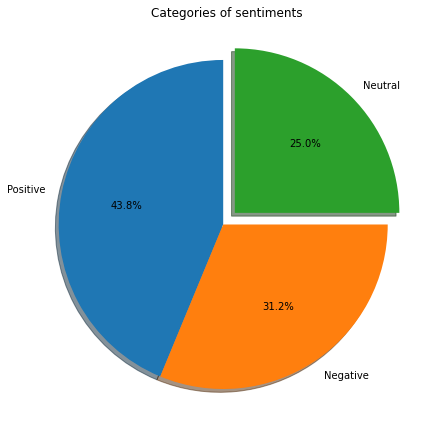

In [16]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Positive', 'Negative','Neutral']
sizes = [7,5,4]

explode = (0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Categories of sentiments')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

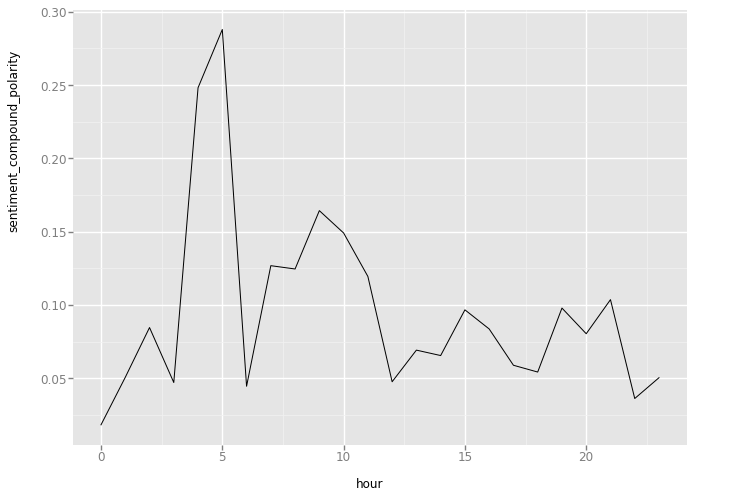

<ggplot: (8754097687517)>


In [4]:
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 6.0)

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
print(ggplot(aes(x='hour',y='sentiment_compound_polarity'),data=df)+geom_line())

Trend looks like it tweet sentiment becomes positive as time goes on 